In [25]:
import numpy as np
import matplotlib.pyplot as plt

#### **Задача 7.1.10**

In [26]:
def euler(t_arr, y0, f):
    y_arr = np.zeros(t_arr.size)
    y_arr[0] = y0

    for i, t in enumerate(t_arr[1:], start=1):
        t_prev = t_arr[i - 1]
        y_prev = y_arr[i - 1]
        h = (t - t_prev)
        
        y_arr[i] = y_prev + h * f(t_prev, y_prev)

    return y_arr

In [27]:
def rkfixed(t_arr, y0, f):
    y_arr = np.zeros(t_arr.size)
    y_arr[0] = y0

    for i, t in enumerate(t_arr[1:], start=1):
        t_prev = t_arr[i - 1]
        y_prev = y_arr[i - 1]
        h = (t - t_prev)

        k1 = f(t_prev, y_prev)
        k2 = f(t_prev + h/2, y_prev + h/2 * k1)
        k3 = f(t_prev + h/2, y_prev + h/2 * k2)
        k4 = f(t_prev + h, y_prev + h * k3)

        y_arr[i] = y_prev + h/6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return y_arr

In [28]:
def f(t, y):
    return (-2 * t * y + 2 * (t ** 2))/(1 + t**2)


t0 = 0
T = 1
y0 = 2/3
h = 0.1

In [29]:
def y_solution(t):
    return 2/3 * (1 + t**3) / (1 + t**2)


t_list = np.arange(t0, T + 1e-3, h)

y_euler = euler(t_list, y0, f)
y_rk = rkfixed(t_list, y0, f)
y_true = y_solution(t_list)

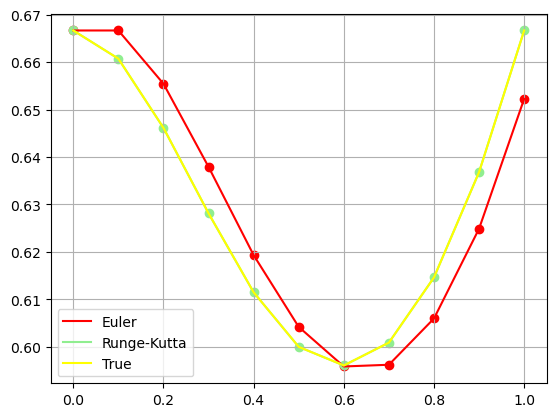

In [30]:
plt.plot(t_list, y_euler, c='red', label='Euler')
plt.scatter(t_list, y_euler, c='red')

plt.plot(t_list, y_rk, c='lightgreen', label='Runge-Kutta')
plt.scatter(t_list, y_rk, c='lightgreen')

plt.plot(t_list, y_true, c='yellow', label='True')

plt.grid(True)
plt.legend()
plt.savefig(fname='plots/task1_plots.png')
plt.show()

In [31]:
print("Classic errors")
print()
print(f"Euler method: {np.abs(y_true - y_euler).max()}")
print(f"Runge-Kutta: {np.abs(y_true - y_rk).max()}")

Classic errors

Euler method: 0.01440083612916554
Runge-Kutta: 4.349088473798446e-07


In [32]:
t_list2 = np.arange(t0, T + 1e-4, h/2)

y_euler2 = euler(t_list2, y0, f)
y_rk2 = rkfixed(t_list2, y0, f)

print("Error according to the Runge rule")
print()
print(f"Euler method: {np.abs(y_euler - y_euler2[::2]).max()}")
print(f"Runge-Kutta: {np.abs(y_rk - y_rk2[::2]).max()/15}")

Error according to the Runge rule

Euler method: 0.007143932048743973
Runge-Kutta: 2.715466723331635e-08


In [33]:
def get_error(y_true, y_pred):
    return np.abs(y_true - y_pred).max()


eps_rk = get_error(y_true, y_rk)
eps_euler = get_error(y_true, y_euler)

print(f"h: {h}")
print(f"error: {eps_euler}")
print()
h_opt = h

while eps_euler > eps_rk:
    h_opt /= 2
    xs = np.arange(t0, T + h_opt * 0.1, h_opt)
    ys_euler = euler(xs, y0, f)
    ys_true = y_solution(xs)

    eps_euler = get_error(ys_true, ys_euler)
    print(f"h: {h_opt}")
    print(f"error: {eps_euler}")
    print()

h: 0.1
error: 0.01440083612916554

h: 0.05
error: 0.007256904080421567

h: 0.025
error: 0.0036426262707953683

h: 0.0125
error: 0.0018248692421393153

h: 0.00625
error: 0.0009133255481504898

h: 0.003125
error: 0.00045688576291524896

h: 0.0015625
error: 0.00022849866198448865

h: 0.00078125
error: 0.00011426328036157063

h: 0.000390625
error: 5.713512805860521e-05

h: 0.0001953125
error: 2.856843606513504e-05

h: 9.765625e-05
error: 1.428443604967189e-05

h: 4.8828125e-05
error: 7.142272527849158e-06

h: 2.44140625e-05
error: 3.571149890690961e-06

h: 1.220703125e-05
error: 1.7855783605025266e-06

h: 6.103515625e-06
error: 8.927900075894613e-07

h: 3.0517578125e-06
error: 4.4639524676703957e-07

h: 1.52587890625e-06
error: 2.2319767667422497e-07



#### **Задача 7.3.4**

Метод решения: экстраполяционный метод Адамса 3 порядка

In [34]:
def f(t, y):
    return y + 2 * t * (y ** 2)

t0 = 0
T = 0.8
y0 = 0.5
h = 0.10 # выбранное значение

In [35]:
def adams(t_arr, y0, f):
    h = t_arr[1] - t_arr[0]

    y_arr = np.zeros(t_arr.size)
    y_arr[0:3] = rkfixed(t_arr[0:3], y0, f)
    
    for i, t in enumerate(t_arr[3:], start=3):
        t_prev3 = t_arr[i - 3]
        y_prev3 = y_arr[i - 3]
        y3 = f(t_prev3, y_prev3)

        t_prev2 = t_arr[i - 2]
        y_prev2 = y_arr[i - 2]
        y2 = f(t_prev2, y_prev2)

        t_prev1 = t_arr[i - 1]
        y_prev1 = y_arr[i - 1]
        y1 = f(t_prev1, y_prev1)

        y_arr[i] = y_arr[i - 1] + (h/12) * (23 * y1 - 16 * y2 + 5 * y3)

    return y_arr

In [36]:
def runge_rule(y_pred, y_pred2, p):
    eps = (y_pred - y_pred2[::2]) / (2 ** p - 1)
    error = np.abs(eps).max()
    return eps, error

In [37]:
xs = np.arange(t0, T + h/10, h)
xs2 = np.arange(t0, T + h/10, h/2)

y_rk = rkfixed(xs, y0, f)
y_rk2 = rkfixed(xs2, y0, f)

y_adams = adams(xs, y0, f)
y_adams2 = adams(xs2, y0, f)

In [38]:
eps_rk, error_rk = runge_rule(y_rk, y_rk2, p=4)
eps_adams, error_adams = runge_rule(y_adams, y_adams2, p=3)

In [39]:
print(f"Errors")
print(f"Runge-Kutta: {error_rk}")
print(f"Adams: {error_adams}")

Errors
Runge-Kutta: 5.096234028219015e-05
Adams: 0.02266632175403898


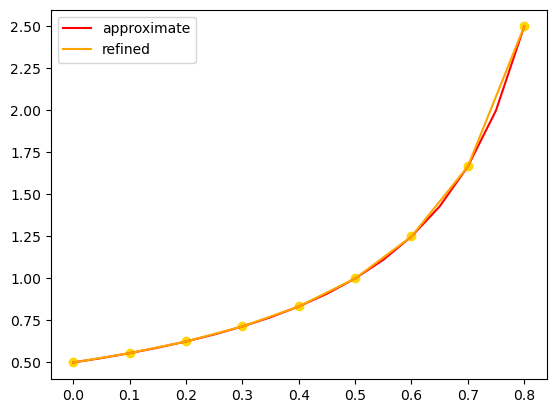

In [40]:
plt.plot(xs2, y_rk2, c='red', label='approximate')
plt.plot(xs, y_rk2[::2] + eps_rk, c='orange', label='refined')
plt.scatter(xs, y_rk2[::2], c='gold')
plt.legend()
# plt.savefig(fname='plots/task2_rk.png')
plt.show()

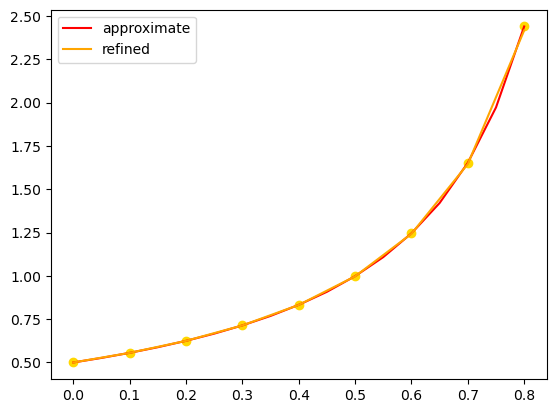

In [42]:
plt.plot(xs2, y_adams2, c='red', label='approximate')
plt.plot(xs, y_adams2[::2] + eps_adams, c='orange', label='refined')
plt.scatter(xs, y_adams2[::2], c='gold')
plt.legend()
plt.savefig(fname='plots/task2_adams.png')
plt.show()

#### **Задача 7.5.4**

In [43]:
def f(t, y):
    return -20 * y + 20 - 19 * np.exp(-t)


def y_sol(t):
    return 1 - np.exp(-t) + np.exp(-20 * t)


t0 = 0.0
T = 1.5
y0 = 1
h0 = 0.15
eps = 0.001 # выбранное значение

In [44]:
t_arr0 = np.arange(t0, T + h0 * 1e-2, h0)

y_euler = euler(t_arr0, y0, f)
y_rk = rkfixed(t_arr0, y0, f)
y_true = y_sol(t_arr0)

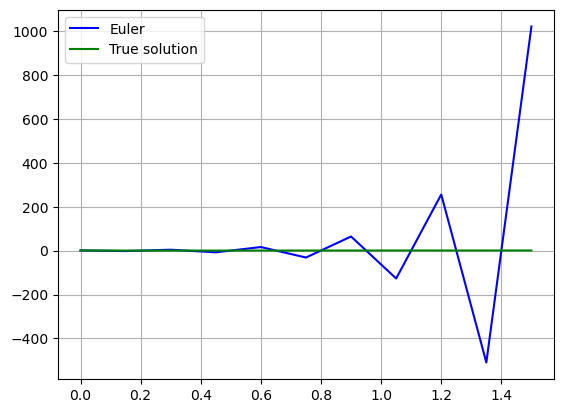

In [45]:
plt.plot(t_arr0, y_euler, c='blue', label='Euler')
plt.plot(t_arr0, y_true, c='green', label='True solution')

plt.legend()
plt.grid(True)

plt.savefig(fname='plots/task3_euler.png')
plt.show()

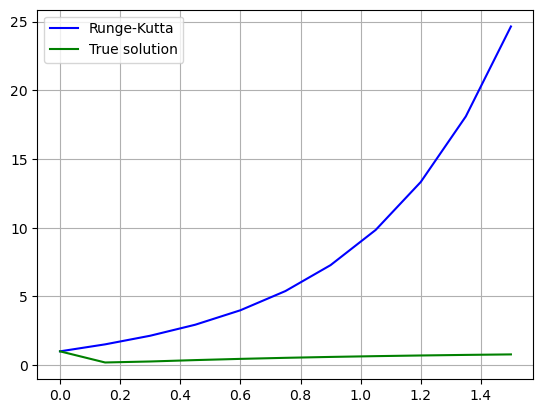

In [46]:
plt.plot(t_arr0, y_rk, c='blue', label='Runge-Kutta')
plt.plot(t_arr0, y_true, c='green', label='True solution')

plt.legend()
plt.grid(True)

plt.savefig(fname='plots/task3_rk.png')
plt.show()

In [47]:
h_euler = h0
error_euler = get_error(y_true, y_euler)

while error_euler > eps:
    h_euler /= 2
    t_arr = np.arange(t0, T + h_euler/10, h_euler)
    
    y_euler_new = euler(t_arr, y0, f)
    y_true_new = y_sol(t_arr)
    error_euler = get_error(y_true_new, y_euler_new)

print(f"Euler optimal h: {h_euler}")
print(f"Error: {error_euler}")

Euler optimal h: 0.000146484375
Error: 0.0005372962489437194


In [48]:
h_rk = h0
error_rk = get_error(y_true, y_rk)

while error_rk > eps:
    h_rk /= 1.2
    t_arr = np.arange(t0, T + h_rk/10, h_rk)

    y_rk_new = rkfixed(t_arr, y0, f)
    y_true_new = y_sol(t_arr)
    error_rk = get_error(y_true_new, y_rk_new)

print(f"Runge-Kutta optimal h: {h_rk}")
print(f"Error: {error_rk}")

Runge-Kutta optimal h: 0.029071004920172238
Error: 0.0005614505765902944
